###importing the necessary libraries

In [22]:
pip install pandas # type: ignore


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 
 

In [24]:
dataset = pd.read_csv('HistoricalPrices.csv')
dataset.head()

,Date,Open,High,Low,Close
0,05/23/25,41525.70,41788.61,41354.09,41603.07
1,05/22/25,41763.68,42090.42,41714.43,41859.09
2,05/21/25,42354.46,42439.27,41785.22,41860.44
3,05/20/25,42735.11,42800.04,42485.37,42677.24
4,05/19/25,42542.81,42842.04,42337.71,42792.07


In [25]:
dataset= dataset.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})
dataset

,Date,Open,High,Low,Close
0,05/23/25,41525.70,41788.61,41354.09,41603.07
1,05/22/25,41763.68,42090.42,41714.43,41859.09
2,05/21/25,42354.46,42439.27,41785.22,41860.44
3,05/20/25,42735.11,42800.04,42485.37,42677.24
4,05/19/25,42542.81,42842.04,42337.71,42792.07
...,...,...,...,...,...
58,03/03/25,43900.49,44033.78,42919.31,43191.24
59,02/28/25,43259.84,43873.55,43100.87,43840.91
60,02/27/25,43516.44,43884.19,43224.53,43239.50
61,02/26/25,43635.42,43866.50,43318.93,43433.12


In [26]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset = dataset.sort_values(by = 'Date', ascending = [False])

dataset

/var/folders/k5/y70cdbnd4p52p6lw24_rbrl40000gn/T/ipykernel_36918/708788763.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Date'] = pd.to_datetime(dataset['Date'])


,Date,Open,High,Low,Close
0,2025-05-23,41525.70,41788.61,41354.09,41603.07
1,2025-05-22,41763.68,42090.42,41714.43,41859.09
2,2025-05-21,42354.46,42439.27,41785.22,41860.44
3,2025-05-20,42735.11,42800.04,42485.37,42677.24
4,2025-05-19,42542.81,42842.04,42337.71,42792.07
...,...,...,...,...,...
58,2025-03-03,43900.49,44033.78,42919.31,43191.24
59,2025-02-28,43259.84,43873.55,43100.87,43840.91
60,2025-02-27,43516.44,43884.19,43224.53,43239.50
61,2025-02-26,43635.42,43866.50,43318.93,43433.12


# Drawing Line Plots


### Line Plots with single Line

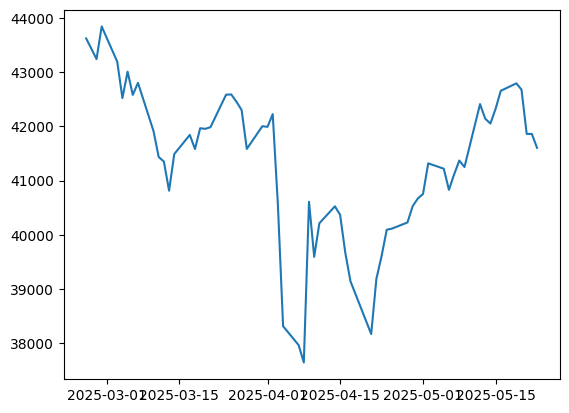

In [27]:
plt.plot(dataset['Date'], dataset['Close'])
plt.show()

### Line Plots with Multiple Lines

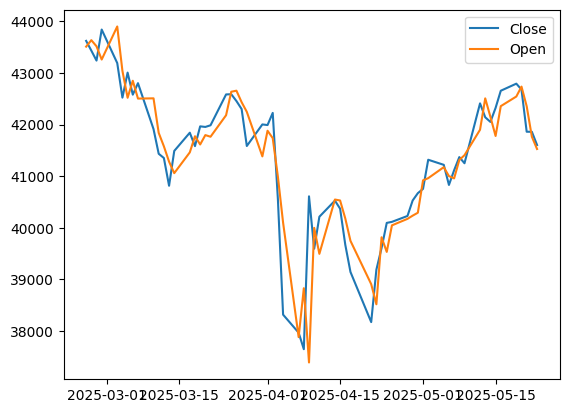

In [31]:
plt.plot(dataset['Date'], dataset['Close'], label = 'Close')
plt.plot(dataset['Date'], dataset['Open'], label = 'Open')
plt.legend()
plt.show()


## Drawing Bar Plot

/var/folders/k5/y70cdbnd4p52p6lw24_rbrl40000gn/T/ipykernel_36918/3095826170.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset_monthly_mean = dataset.groupby('Month')[dataset.select_dtypes(include = 'number').columns] \


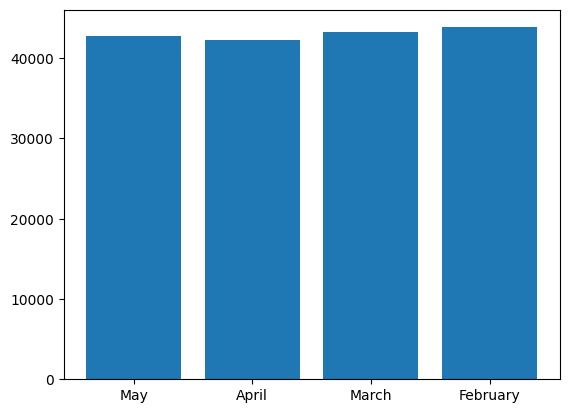

In [50]:
from calendar import month_name

months = list(month_name[1:])

dataset['Month'] = pd.Categorical(dataset['Date'].dt.month_name(),categories = months, ordered = True)

dataset_monthly_mean = dataset.groupby('Month')[dataset.select_dtypes(include = 'number').columns] \
                                .mean() \
                                .reset_index()


dataset_monthly_mean.head(6)

plt.bar(dataset['Month'], height = dataset['Close'])

plt.show()